### Old version

can we use parallel reps to find a chat-gpt essay most similar and different from human essays? Meaning, if you use token weights from AFRN, can you compute the euclidean distance or cosine similarity and present samples or sentences that are very similar and different from human generated essays?


In [54]:
import os, random
import pandas as pd
from math import sqrt
reps_folder = './output/lexicon_v5/drug/output_representations/'
AFRN_weights = './output/lexicon_v5/drug/output_key_FRN.txt'
ori_text_file = './upload/drug/drug.txt'


In [31]:

'''
    1. Prepare for the two texts from two different classes
    2. get their indices for extracting their representations
    3. this is for testing the code, cannot calculate the global differentiation
'''
text_file = open(ori_text_file, 'r', errors='replace').readlines()
ori_texts = [row.split('\t')[1] for row in text_file]
labels = [row.split('\t')[0] for row in text_file]

# Find two texts with different labels
index_1, index_2 = random.sample(range(len(labels)), 2)
while labels[index_1] == labels[index_2]:
    index_1, index_2 = random.sample(range(len(labels)), 2)
ori_text_1, label_1 = ori_texts[index_1], labels[index_1]
ori_text_2, label_2 = ori_texts[index_2], labels[index_2]

# print(ori_text_1, label_1, index_1)
# print(ori_text_2, label_2, index_2)

In [32]:
'''
    load the AFRN weight file using dataframe, first element is token, the second element is weight
'''
lines = open(AFRN_weights, 'r', errors='replace').readlines()
data = [line.split('\t')[::len(line.split('\t'))-1] for line in lines]
token_weight = pd.DataFrame(data, columns=['token', 'weight'])
token_weight['weight'] = pd.to_numeric(token_weight['weight'])
token_weight = token_weight.drop(token_weight.index[0])

In [40]:
'''
    Get all representations for the two selected texts
'''
reps_1 = []
reps_2 = []
reps_files = os.listdir(reps_folder)
for file in reps_files:
    reps_text = open(reps_folder + file, 'r', errors='replace').readlines()
    if len(reps_text) != len(text_file): raise ValueError(f'Amount of text in representaion ({file}) file: {len(reps_text)} is not consistent with that in ori file: {len(text_file)}')
    reps_1.append((file[22:-4], reps_text[index_1]))
    reps_2.append((file[22:-4], reps_text[index_2]))

In [47]:
'''Get the reps weights for first text'''

# Initialize the new list
reps_1_weight = []

# Find the reference list (the text with type 'Word')
reference_list = [text.split() for type_, text in reps_1 if type_ == 'Word'][0]

# Iterate over the original list
for item in reps_1:
    type_, text = item
    if type_ != 'Word':
        # Split the text into tokens
        tokens = text.split()

        # For each token, if it's not in the reference list and in the DataFrame, find its weight; 
        # otherwise, assign it a weight of zero
        weights = [token_weight.loc[token_weight['token'] == token, 'weight'].values[0] 
                   if (token not in reference_list and token in token_weight['token'].values) else 0 
                   for token in tokens]

        # Create a new tuple with the type, text and weights and append it to the new list
        reps_1_weight.append((type_, weights))


In [51]:
'''Get the reps weights for second text'''

# Initialize the new list
reps_2_weight = []

# Find the reference list (the text with type 'Word')
reference_list = [text.split() for type_, text in reps_2 if type_ == 'Word'][0]

# Iterate over the original list
for item in reps_2:
    type_, text = item
    if type_ != 'Word':
        # Split the text into tokens
        tokens = text.split()

        # For each token, if it's not in the reference list and in the DataFrame, find its weight; 
        # otherwise, assign it a weight of zero
        weights = [token_weight.loc[token_weight['token'] == token, 'weight'].values[0] 
                   if (token not in reference_list and token in token_weight['token'].values) else 0 
                   for token in tokens]

        # Create a new tuple with the type, text and weights and append it to the new list
        reps_2_weight.append((type_, weights))


In [53]:
for i in reps_1_weight:
    print(i)

('Affect', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5026027173973201, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.3561191377770871, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5026027173973201, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5546719213688709, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
('Boundaries', [0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931

In [52]:
for i in reps_2_weight:
    print(i)

('Affect', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0593544989986982, 0, 0.1403287726155462, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
('Boundaries', [0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 0.2931779463076294, 

In [55]:
def euclidean_distance(v1, v2):
    return sqrt(sum((x - y) ** 2 for x, y in zip(v1, v2)))

for r_1, r_2 in zip(reps_1_weight, reps_2_weight):
    print(r_1[0], euclidean_distance(r_1[1], r_2[1]))

Affect 0.6345434995344594
Boundaries 0.6555658174476428
Hypernym 3.32821023799088
Legomena 0.2432226343928716
LexiconADR 0.9990873293786349
LexiconAILEXCAT 1.4691290913961395
LexiconAILEXINT 0.64988007262228
LexiconEMOLEX 1.4091081357894961
LexiconGLOVECC 3.4432664533930377
LexiconGLOVETW 2.58632538598888
LexiconGLOVEWG 1.5350203129813373
LexiconLIWC 3.4675071111167473
LexiconSAVLEX 1.0040087046659427
LexiconSYN 2.4877096334318853
Misspelling 0.0
NER 0.4188147023915747
POS 0.7921713944616946
Sentiment 0.559255040166462
Word&NER 2.183260787153736
Word&POS 5.588264915078933
Word&Sense 3.0220798879822643


### Download dataset

In [6]:
import os
from datasets import load_dataset

# Sample location
data_sample_path = './sample_1'
if not os.path.exists(data_sample_path):
    os.makedirs(data_sample_path)

sample_hf_data = load_dataset("Anonymous07082024/textagon_sample", cache_dir=data_sample_path)

Resolving data files: 100%|██████████| 29/29 [00:01<00:00, 15.59it/s]


### New Integration

In [1]:
import os
import pandas as pd
import csv
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate
import matplotlib.pyplot as plt
import six
import re
import nltk
from nltk.corpus import words

C:\Users\Ruiya\AppData\Local\Temp\ipykernel_3392\682406740.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_axis, rotation=30, weight='bold', fontsize=9)


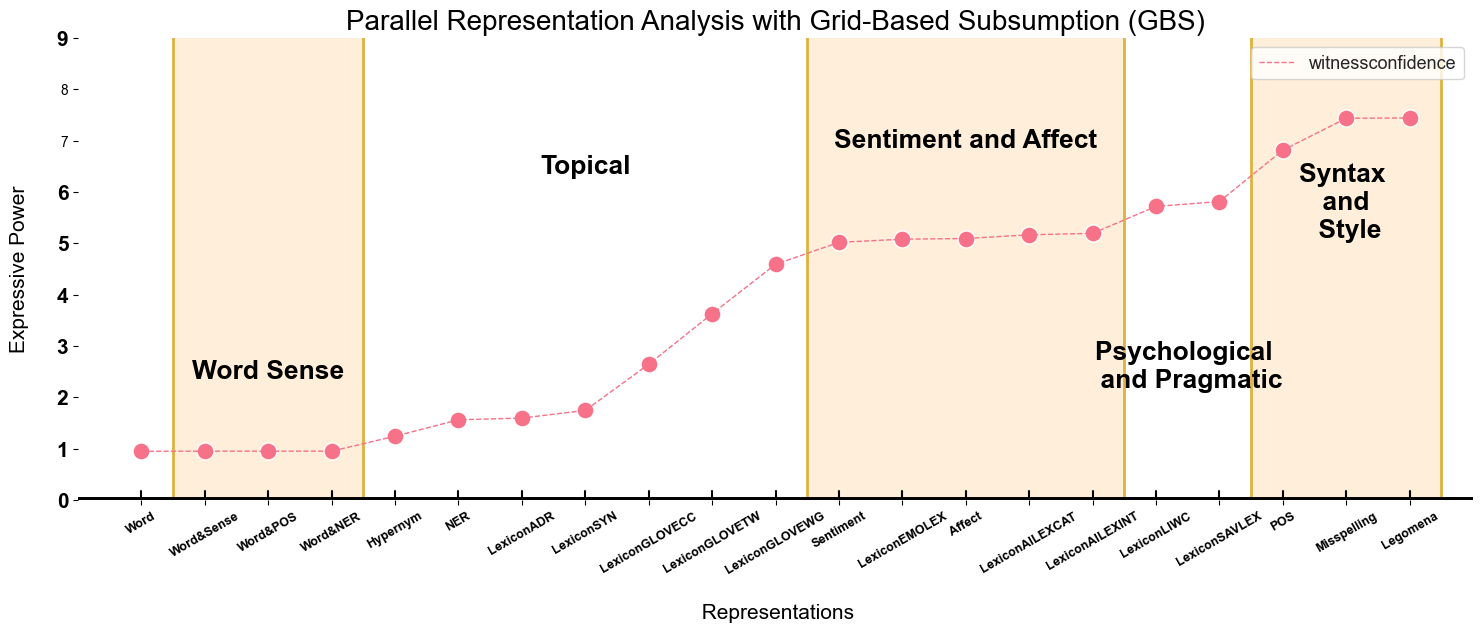

In [2]:
### Set the parameters ###
textagon_output_folder = './sample_textagon_outputs/witnessconfidence'
data_name = 'witnessconfidence'
analysis_output_addr = './'


### Below is code do not need to change ###
if 'result_GBS.csv' not in os.listdir(textagon_output_folder):
    raise ValueError(f'The result file is not in the folder: {textagon_output_folder}')

correct_data = []
column_names = ["Path", "Index", "Category", "Total", "Number", "Ratio"]
df = pd.read_csv(f'{textagon_output_folder}/result_GBS.csv', names=column_names)
category_ratio_dict = df.set_index('Category')['Ratio'].to_dict()
c = 0
for key in category_ratio_dict.keys():
    c += category_ratio_dict[key]
    category_ratio_dict[key] = c
correct_data.append(category_ratio_dict)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
import re

x_axis = ['Word', 'Word&Sense', 'Word&POS', 'Word&NER', 'Hypernym', 'NER', 'LexiconADR', 'LexiconSYN', 'LexiconGLOVECC', 'LexiconGLOVETW', 'LexiconGLOVEWG', 'Sentiment', 'LexiconEMOLEX', 'Affect', 'LexiconAILEXCAT', 'LexiconAILEXINT', 'LexiconLIWC', 'LexiconSAVLEX', 'POS', 'Misspelling', 'Legomena']

fig, ax = plt.subplots(figsize=(18, 6)) 
line_styles = [ '--', '-.']

def plot_data(data, label, linestyle, linewidth, color):
    sorted_data = {k: data[k] if k in data else 0 for k in x_axis}
    sns.lineplot(x=x_axis, y=list(sorted_data.values()), sort=False, linewidth=linewidth, linestyle=linestyle, ax=ax, label=data_name, color=color)
    sns.scatterplot(x=x_axis, y=list(sorted_data.values()), s=150, ax=ax, color=color)
    # for i, y in enumerate(list(sorted_data.values())):
    #     ax.text(i, y, f'{y:.2f}', color=color, ha='center', va='bottom')


highlighted_label = 'FCE/ASAP Human/ChatGPT'
# palette = sns.color_palette(['#9236f5', '#3ea4ed', '#20ab5c', '#e38c22'])
palette = sns.color_palette("husl", len(correct_data))
palette = [color for color in palette if not np.allclose(color, (1.0, 0.0, 0.0))]
# palette = sns.color_palette("husl", len(correct_data))

for i, data in enumerate(correct_data):
    # if legend_names[i] == highlighted_label:
    #     plot_data(data, legend_names[i], '-', 4.5, 'red')
    # else:
    plot_data(data, data_name, line_styles[i % len(line_styles)], (i % 3) + 1, palette[i % len(palette)])

ax.legend()

rectangle_1 = patches.Rectangle((0.5, 0), 3, 9, linewidth=2, facecolor='#FFEED9', fill=True, zorder=0)
rectangle_1.set_clip_on(False)
plt.axvline(0.5, 0, 8.5, color='#DEB240', linewidth=2, zorder=1)
plt.axvline(3.5, 0, 8.5, color='#DEB240', linewidth=2, zorder=1)
ax.add_patch(rectangle_1)

rectangle_2 = patches.Rectangle((10.5, 0), 5, 9, linewidth=2, facecolor='#FFEED9', fill=True, zorder=0)
rectangle_2.set_clip_on(False)
plt.axvline(10.5, 0, 8.5, color='#DEB240', linewidth=2, zorder=1)
plt.axvline(15.5, 0, 8.5, color='#DEB240', linewidth=2, zorder=1)
ax.add_patch(rectangle_2)

rectangle_3 = patches.Rectangle((17.5, 0), 3, 9, linewidth=2, facecolor='#FFEED9', fill=True, zorder=0)
rectangle_3.set_clip_on(False)
plt.axvline(17.5, 0, 8.5, color='#DEB240', linewidth=2, zorder=1)
plt.axvline(20.5, 0, 8.5, color='#DEB240', linewidth=2, zorder=1)
ax.add_patch(rectangle_3)

plt.text(2, 2.5, 'Word Sense', horizontalalignment='center', verticalalignment='center', fontsize=19, color='black', weight='bold')
plt.text(7, 6.5, 'Topical', horizontalalignment='center', verticalalignment='center', fontsize=19, color='black', weight='bold')
plt.text(13, 7, 'Sentiment and Affect', horizontalalignment='center', verticalalignment='center', fontsize=19, color='black', weight='bold')
plt.text(16.5, 2.6, 'Psychological \n and Pragmatic', horizontalalignment='center', verticalalignment='center', fontsize=19, color='black', weight='bold')
plt.text(19, 5.8, 'Syntax \n and \n Style', horizontalalignment='center', verticalalignment='center', fontsize=19, color='black', weight='bold')

plt.axhline(0, color='black', linewidth=5, zorder=1)
plt.xticks(rotation=45, weight='bold', fontsize=15)
plt.yticks(weight='bold', fontsize=15)

sns.despine(top=True, right=True, left=True, bottom=True)
sns.set_style("whitegrid")
sns.set(style="whitegrid", rc={'axes.grid': True, 'grid.linestyle': '--'})
ax.xaxis.grid(False)
ax.set_ylim(0, 9)
ax.legend(fontsize=13)
ax.set_xticklabels(x_axis, rotation=30, weight='bold', fontsize=9)

def add_ticks_for_labels():
    for i, _ in enumerate(x_axis):
        ax.axvline(i, 0, 0.02, color='black')  # Here, 0.02 defines the length of the tick relative to y-axis
add_ticks_for_labels() 

plt.xlabel("\n Representations", fontsize=15)
plt.ylabel("Expressive Power\n", fontsize=15)
plt.title("Parallel Representation Analysis with Grid-Based Subsumption (GBS)", fontsize=20)

plt.savefig(f'{analysis_output_addr}/GBS_{data_name}.pdf', bbox_inches='tight')

plt.show()
